

# Adventure Works - Sales
## format: XLSX

# FILE DOWNLOAD AND CONFIG.
upload your  ['AdventureWorsl Sales.xlsx'](https://github.com/microsoft/powerbi-desktop-samples/tree/main/AdventureWorks%20Sales%20Sample) to Google Colab project folder

### import packages

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import openpyxl
from pprint import pprint

### check packages
check all packages intalled and respective versions using **bash/pip** command

In [ ]:
!pip list

### import file
import **'AdventureWorks Sales.xlsx'** with the root project path

In [3]:
file_name = '/content/AdventureWorks Sales.xlsx'
file = pd.ExcelFile(file_name)

### check for **sheet_names** and quantity

In [4]:
pprint(file.sheet_names)

qtd_abas=0
for sheet_name in file.sheet_names:
    qtd_abas += 1
print(f'\ntotal: {qtd_abas}')

['Sales Order_data',
 'Sales Territory_data',
 'Sales_data',
 'Reseller_data',
 'Date_data',
 'Product_data',
 'Customer_data']

total: 7


### create **dict**
df = dictionary (list, dict)   
df['table_name'] = dataframe

In [5]:
df = {}
for sheet_name in file.sheet_names:
    df[sheet_name] = file.parse(sheet_name)

In [ ]:
pprint(df.items())

### set float notation
configure float outputs to two numbers after comma

**example:** 1232123.989768767 -> 1232123.99

In [6]:
pd.options.display.float_format = "{:.2f}".format

# SAMPLES:

### customer

### product

In [7]:
df['Product_data'].sample(5)

,ProductKey,SKU,Product,Standard Cost,Color,List Price,Model,Subcategory,Category
360,570,BK-T18Y-54,"Touring-3000 Yellow, 54",461.44,Yellow,742.35,Touring-3000,Touring Bikes,Bikes
114,324,BK-R50R-62,"Road-650 Red, 62",413.15,Red,699.10,Road-650,Road Bikes,Bikes
306,516,SE-M798,ML Mountain Seat/Saddle,17.38,NaN,39.14,ML Mountain Seat/Saddle 2,Saddles,Components
349,559,CH-0234,Chain,8.99,Silver,20.24,Chain,Chains,Components
116,326,BK-R50R-44,"Road-650 Red, 44",413.15,Red,699.10,Road-650,Road Bikes,Bikes


### date

In [ ]:
df['Date_data'].sample(5)

,DateKey,Date,Fiscal Year,Fiscal Quarter,Month,Full Date,MonthKey
104,20171013,2017-10-13,FY2018,FY2018 Q2,2017 Oct,"2017 Oct, 13",201710
595,20190216,2019-02-16,FY2019,FY2019 Q3,2019 Feb,"2019 Feb, 16",201902
470,20181014,2018-10-14,FY2019,FY2019 Q2,2018 Oct,"2018 Oct, 14",201810
754,20190725,2019-07-25,FY2020,FY2020 Q1,2019 Jul,"2019 Jul, 25",201907
861,20191109,2019-11-09,FY2020,FY2020 Q2,2019 Nov,"2019 Nov, 09",201911


### reseller

In [ ]:
df['Reseller_data'].sample(5)

### sales

In [ ]:
df['Sales_data'].sample(5)

### order

In [ ]:
df['Sales Order_data'].sample(5)

### territory

In [ ]:
df['Sales Territory_data'].sample(5)

# FULL CONCAT TABLE

**df_all** = all dataframe inside df dictionary     
nesta primeira etapa, está feito o merge entre todas as tabelas, menos a tabela data, pois existem 3 referencias distintas para o ID em 3 colunas diferentes



### **df_all** (complete table)

In [8]:
df_all = df['Sales_data']
df_all = df_all.merge(df['Sales Order_data'], on='SalesOrderLineKey', how='left')
df_all = df_all.merge(df['Sales Territory_data'], on='SalesTerritoryKey', how='left')
df_all = df_all.merge(df['Reseller_data'], on='ResellerKey', how='left')
df_all = df_all.merge(df['Product_data'], on='ProductKey', how='left')
df_all = df_all.merge(df['Customer_data'], on='CustomerKey', how='left')

inserindo referencia das datas para cada uma das 3 colunas que utilizam seu ID:   
foi preciso fazer o astype('int64') de uma delas pois estava armazenada como *float*

### astype / fillna
foi necessario converter a coluna com tipo *float* para *int*, alem de tratar casos com valores *null/(NaN)* utilizamos o valor '0' para possibilitar assim o convert    
o **print** da conversão mostra o tipo antes e depois

In [9]:
print(df_all['OrderDateKey'].dtypes)
print(df_all['DueDateKey'].dtypes)
print(df_all['ShipDateKey'].dtypes)

df_all['ShipDateKey'] = df_all['ShipDateKey'].fillna(0).astype('int64')

print('---------')
print(df_all['OrderDateKey'].dtypes)
print(df_all['DueDateKey'].dtypes)
print(df_all['ShipDateKey'].dtypes)

int64
int64
float64
---------
int64
int64
int64


In [10]:
df_all = df_all.merge(df['Date_data'].rename(columns={'DateKey':'OrderDateKey', 'Full Date':'Full_OrderDate'}), on='OrderDateKey', how='left', suffixes=('', '_OrderDate'))
df_all = df_all.merge(df['Date_data'].rename(columns={'DateKey':'DueDateKey', 'Full Date':'Full_DueDate'}), on='DueDateKey', how='left', suffixes=('', '_DueDate'))
df_all = df_all.merge(df['Date_data'].rename(columns={'DateKey':'ShipDateKey', 'Full Date':'Full_ShipDate'}), on='ShipDateKey', how='left', suffixes=('', '_ShipDate'))

print dictionary to see the results:

In [11]:
df_all.sample(100)

,SalesOrderLineKey,ResellerKey,CustomerKey,ProductKey,OrderDateKey,DueDateKey,ShipDateKey,SalesTerritoryKey,Order Quantity,Unit Price,...,Fiscal Quarter_DueDate,Month_DueDate,Full_DueDate,MonthKey_DueDate,Date_ShipDate,Fiscal Year_ShipDate,Fiscal Quarter_ShipDate,Month_ShipDate,Full_ShipDate,MonthKey_ShipDate
108546,69796001,-1,11966,535,20200403,20200413,20200410,9,1,24.99,...,FY2020 Q4,2020 Apr,"2020 Apr, 13",202004,2020-04-10,FY2020,FY2020 Q4,2020 Apr,"2020 Apr, 10",202004.00
63180,46795001,-1,26234,362,20180613,20180623,20180620,4,1,2049.10,...,FY2018 Q4,2018 Jun,"2018 Jun, 23",201806,2018-06-20,FY2018,FY2018 Q4,2018 Jun,"2018 Jun, 20",201806.00
117831,73672003,-1,21142,487,20200524,20200603,20200531,1,1,54.99,...,FY2020 Q4,2020 Jun,"2020 Jun, 03",202006,2020-05-31,FY2020,FY2020 Q4,2020 May,"2020 May, 31",202005.00
12103,47018036,167,-1,447,20180822,20180901,20180829,4,4,15.00,...,FY2019 Q1,2018 Sep,"2018 Sep, 01",201809,2018-08-29,FY2019,FY2019 Q1,2018 Aug,"2018 Aug, 29",201808.00
50285,63228001,62,-1,390,20200218,20200228,20200225,5,1,672.29,...,FY2020 Q3,2020 Feb,"2020 Feb, 28",202002,2020-02-25,FY2020,FY2020 Q3,2020 Feb,"2020 Feb, 25",202002.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34091,51774016,535,-1,517,20190816,20190826,20190823,7,2,31.58,...,FY2020 Q1,2019 Aug,"2019 Aug, 26",201908,2019-08-23,FY2020,FY2020 Q1,2019 Aug,"2019 Aug, 23",201908.00
25816,49879029,496,-1,233,20190425,20190505,20190502,6,7,28.84,...,FY2019 Q4,2019 May,"2019 May, 05",201905,2019-05-02,FY2019,FY2019 Q4,2019 May,"2019 May, 02",201905.00
29409,50707001,649,-1,327,20190612,20190622,20190619,4,1,469.79,...,FY2019 Q4,2019 Jun,"2019 Jun, 22",201906,2019-06-19,FY2019,FY2019 Q4,2019 Jun,"2019 Jun, 19",201906.00
86185,60049001,-1,13048,535,20191114,20191124,20191121,9,1,24.99,...,FY2020 Q2,2019 Nov,"2019 Nov, 24",201911,2019-11-21,FY2020,FY2020 Q2,2019 Nov,"2019 Nov, 21",201911.00


### export sample to excel
the file can be downloaded

In [ ]:
sample_df = df_all.sample(100)
sample_df.to_excel('df_all_sample.xlsx', index=False)

### export full dataframe
it can take few minutes to export the file...    
the file can be downloaded

In [ ]:
df_all.to_excel('df_all_full.xlsx', index=False)

# ANALYTICS

### isnull

In [12]:
df_all.isnull().sum()

SalesOrderLineKey              0
ResellerKey                    0
CustomerKey                    0
ProductKey                     0
OrderDateKey                   0
DueDateKey                     0
ShipDateKey                    0
SalesTerritoryKey              0
Order Quantity                 0
Unit Price                     0
Extended Amount                0
Unit Price Discount Pct        0
Product Standard Cost          0
Total Product Cost             0
Sales Amount                   0
Channel                        0
Sales Order                    0
Sales Order Line               0
Region                         0
Country                        0
Group                          0
Reseller ID                    0
Business Type                  0
Reseller                       0
City_x                         0
State-Province_x               0
Country-Region_x               0
Postal Code_x                  0
SKU                            0
Product                        0
Standard C

### describe

In [ ]:
df_prod_std_cost = pd.DataFrame(df_all['Product Standard Cost'])
df_prod_std_cost.describe()

,Product Standard Cost
count,121253.00
mean,362.64
std,541.69
min,0.86
25%,9.16
50%,38.49
75%,486.71
max,2171.29


### mean
retorna a mediana da coluna    
no caso a mediana de faturamento de vendas

In [ ]:
df_sales_amnt = pd.DataFrame(df_all['Sales Amount'])
df_sales_amnt.mean()

Sales Amount   905.62
dtype: float64

### max / min
retorna o valor maximo e minimo da coluna respectivamente

In [13]:
df_std_cost = pd.DataFrame(df_all['Product Standard Cost'])
print(df_std_cost.max())
print(df_std_cost.min())

Product Standard Cost   2171.29
dtype: float64
Product Standard Cost   0.86
dtype: float64


### sum

In [ ]:
df_sales_amnt.sum()

Sales Amount   109809274.20
dtype: float64

### sort_values

In [ ]:
df_sales_amnt.sort_values('Sales Amount', ascending=False).head(5)

,Sales Amount
40871,27893.62
769,27055.76
31396,26159.21
658,24938.48
42399,23667.85


### nlargest / nsmallest

In [ ]:
print(df_sales_amnt.nlargest(5, 'Sales Amount'))
print(df_sales_amnt.nsmallest(5, 'Sales Amount'))

       Sales Amount
40871      27893.62
769        27055.76
31396      26159.21
658        24938.48
42399      23667.85
       Sales Amount
30781          1.37
31055          1.37
31802          1.37
32091          1.37
32165          1.37


### create/drop column

In [14]:
#create
# criamos a coluna 'lucro' para dropar apenas 'Lucro' sera utilizado
df_all['lucro'] = df_all['Sales Amount'] - df_all['Product Standard Cost']
df_all['Lucro'] = df_all['Sales Amount'] - df_all['Product Standard Cost']

#drop
# axis=1 -> drop column  | axis=0 -> drop line/tuple
df_all = df_all.drop('lucro', axis=1)

print(df_all['Lucro'].head(5))

0    126.90
1   4176.89
2    126.90
3    127.84
4    127.84
Name: Lucro, dtype: float64


### groupby

In [29]:
df_sales_month = df_all.groupby([df_all['Date'].dt.year, df_all['Date'].dt.month])[['Product Standard Cost', 'Sales Amount', 'Lucro']].sum()
print(df_sales_month)

           Product Standard Cost  Sales Amount      Lucro
Date Date                                                
2017 7                 780456.26    1423357.32  642901.06
     8                 882444.60    2057902.45 1175457.85
     9                1053846.87    2523947.55 1470100.68
     10                335651.93     561681.48  226029.55
     11               1812474.47    4764920.16 2952445.69
     12                356425.65     596746.56  240320.91
2018 1                 665817.43    1327674.63  661857.20
     2                1640101.49    3936463.31 2296361.82
     3                 418839.41     700873.18  282033.77
     4                 729277.54    1519275.24  789997.70
     5                1228832.02    2960378.09 1731546.07
     6                 880804.90    1487671.19  606866.29
     7                 902855.28    2939691.00 2036835.71
     8                1271711.19    3964801.20 2693090.02
     9                 985550.12    3287605.93 2302055.81
     10       

In [28]:
df_sales_year = df_all.groupby(df_all['Date'].dt.year)[['Product Standard Cost', 'Sales Amount', 'Lucro']].sum()
print(df_sales_year)

      Product Standard Cost  Sales Amount       Lucro
Date                                                 
2017             5221299.78   11928555.52  6707255.74
2018            11617582.73   30516891.80 18899309.06
2019            16517672.01   42895109.50 26377437.49
2020            10615069.63   24468717.39 13853647.76


### boolean indexing to filter
conditional clausule    
similar to 'WHERE' using SQL

In [17]:
#condition
df_filter = df_all[df_all['Reseller'] != '[Not Applicable]']

df_best_resellers = df_filter.groupby(df_all['Reseller'])[['Product Standard Cost', 'Sales Amount', 'Lucro']].sum()
df_best_resellers = df_best_resellers.sort_values(['Lucro', 'Sales Amount'], ascending=False)

df_best_resellers = df_best_resellers.head(10)
print(df_best_resellers)

                           Product Standard Cost  Sales Amount     Lucro
Reseller                                                                
Brakes and Gears                       154172.86     877107.19 722934.33
Vigorous Exercise Company              187994.52     841908.77 653914.25
Excellent Riding Supplies              236029.86     853849.18 617819.31
Retail Mall                            191456.02     799277.90 607821.88
Outdoor Equipment Store                140781.99     746317.53 605535.54
Totes & Baskets Company                230125.79     816755.58 586629.79
Latest Sports Equipment                147022.75     724299.64 577276.89
Field Trip Store                       105608.43     671618.03 566009.60
Great Bikes                            137357.68     700803.79 563446.10
Corner Bicycle Supply                  232708.85     787773.04 555064.19


# GRAPHICS (PLOTs)

In [18]:
plt.style.use('ggplot')

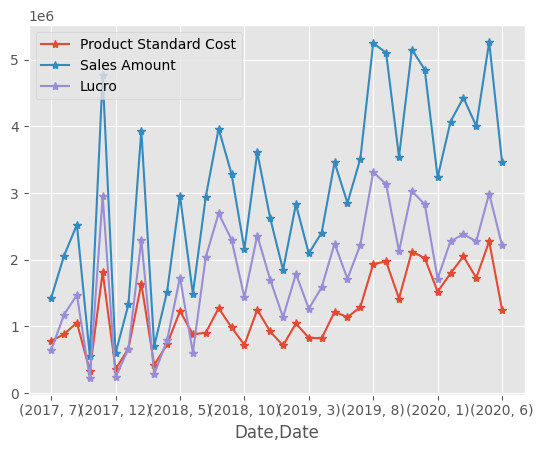

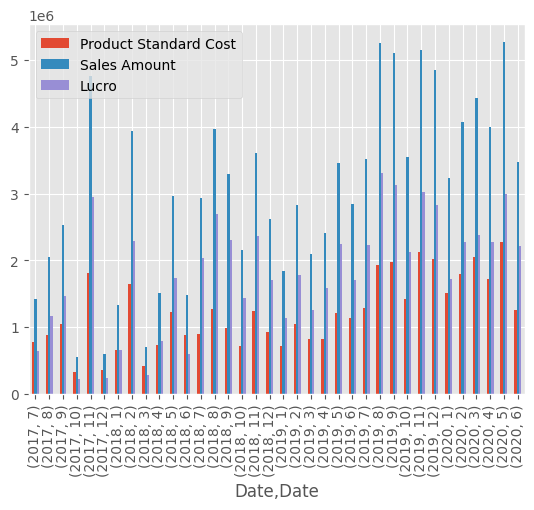

In [19]:
df_sales_month.plot(marker='*');
df_sales_month.plot.bar();

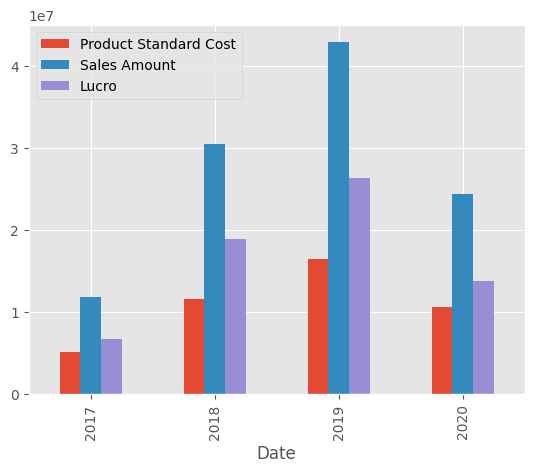

In [20]:
df_sales_year.plot.bar();

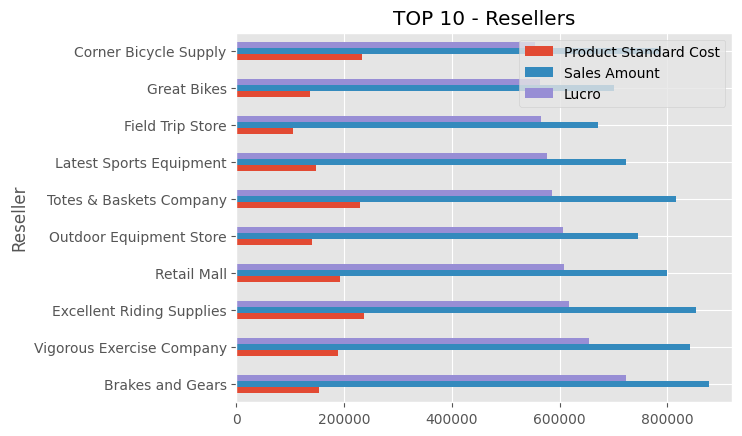

In [21]:
df_best_resellers.plot.barh();
plt.title('TOP 10 - Resellers');

### linear regression

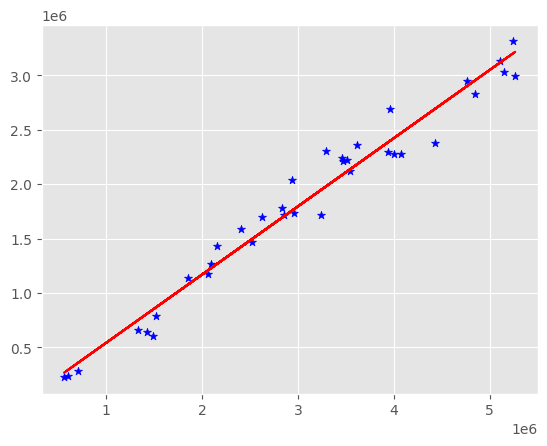

In [44]:
x = df_sales_month['Sales Amount'].fillna(0.0)
y = df_sales_month['Lucro'].fillna(0.0)
coef = np.polyfit(x, y, 1)
m, b = coef
plt.scatter(x, y, marker='*', color='b')
plt.plot(x, m * np.array(x) + b, color='r');

### histogram

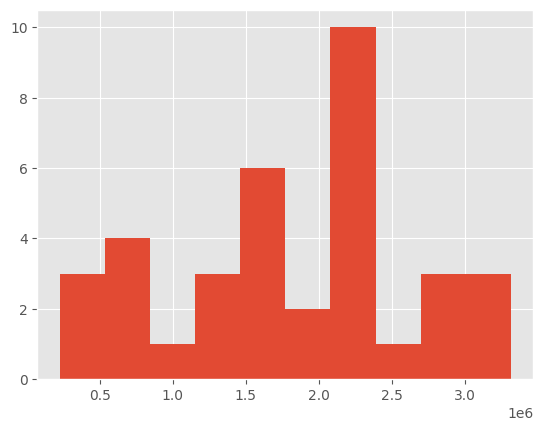

In [46]:
val = df_sales_month['Lucro']
plt.hist(val);

### boxplot

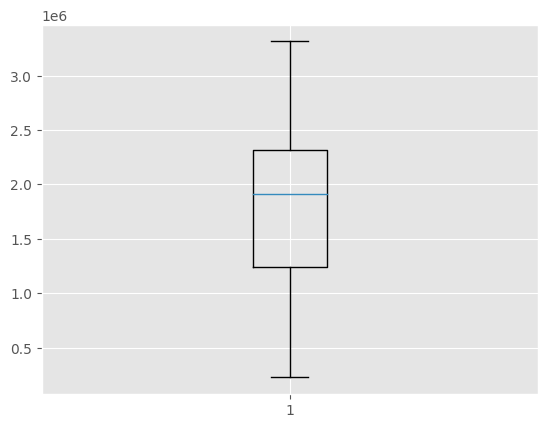

In [47]:
plt.boxplot(val);